## Loss Functions

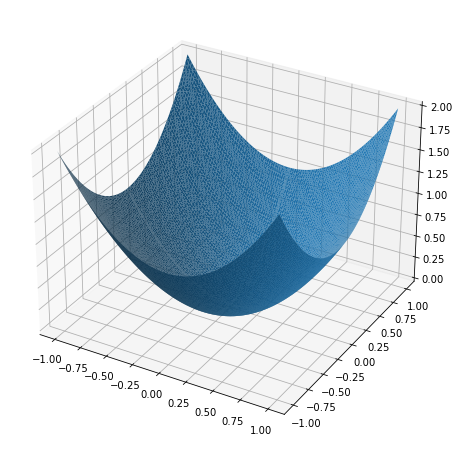

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z = x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)

# fig.savefig('chapter5_plot1.pdf')

plt.show()

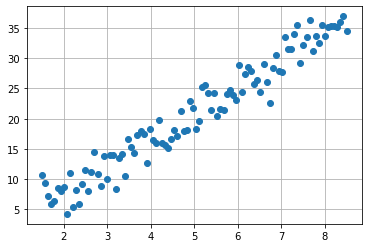

In [5]:
x = np.linspace(1.5, 8.5, num = 100)
y = 4.2*x + np.random.normal(size = 100, loc = 0, scale = 2)

plt.plot(x, y, 'o')
plt.grid()
plt.show()

In [1]:
X = np.linspace(1.5, 8.5, num = 100)
Y_true = 4.2*X + np.random.normal(size = 100, loc = 0, scale = 2)
x = np.append(0, X.flatten())
y = np.linspace(13.2, 18, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z_pred = x - y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)

# fig.savefig('chapter5_plot2.pdf')

plt.show()

NameError: name 'np' is not defined